In [70]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv("./ukol_108.csv", index_col='id')
df

,Nvidia RTX 2080 Ti average FPS release (FPS),Nvidia RTX 2080 Ti average FPS patched (FPS),Nvidia RTX 3070 Ti average FPS release (FPS),Nvidia RTX 3070 Ti average FPS patched (FPS),AMD Radeon RX 6800 XT average FPS release (FPS),AMD Radeon RX 6800 XT average FPS patched (FPS),AMD Radeon RX 7700 XT average FPS release (FPS),AMD Radeon RX 7700 XT average FPS patched (FPS)
id,,,,,,,,
1,85.2,89.2,86.7,91.1,86.2,91.4,90.4,94.7
2,84.0,87.8,87.2,90.7,84.7,89.9,89.5,94.8
3,83.1,87.1,87.4,92.2,86.4,92.2,91.3,96.4
4,83.3,87.6,88.4,92.6,87.1,93.5,90.7,95.9
5,83.1,86.6,87.4,91.7,85.4,91.0,89.9,95.0
...,...,...,...,...,...,...,...,...
75,NaN,NaN,NaN,NaN,NaN,NaN,90.8,96.0
76,NaN,NaN,NaN,NaN,NaN,NaN,91.1,96.4
77,NaN,NaN,NaN,NaN,NaN,NaN,90.8,95.9


In [6]:
# Lets fill nan values with means
for column in df.columns:
    mean = df[column].mean()
    df[column] = df[column].fillna(value=mean)
df.isnull().values.any()

False

In [9]:
df

,Nvidia RTX 2080 Ti average FPS release (FPS),Nvidia RTX 2080 Ti average FPS patched (FPS),Nvidia RTX 3070 Ti average FPS release (FPS),Nvidia RTX 3070 Ti average FPS patched (FPS),AMD Radeon RX 6800 XT average FPS release (FPS),AMD Radeon RX 6800 XT average FPS patched (FPS),AMD Radeon RX 7700 XT average FPS release (FPS),AMD Radeon RX 7700 XT average FPS patched (FPS)
id,,,,,,,,
1,85.2,89.2,86.7,91.1,86.2,91.4,90.4,94.7
2,84.0,87.8,87.2,90.7,84.7,89.9,89.5,94.8
3,83.1,87.1,87.4,92.2,86.4,92.2,91.3,96.4
4,83.3,87.6,88.4,92.6,87.1,93.5,90.7,95.9
5,83.1,86.6,87.4,91.7,85.4,91.0,89.9,95.0
...,...,...,...,...,...,...,...,...
75,NaN,NaN,NaN,NaN,NaN,NaN,90.8,96.0
76,NaN,NaN,NaN,NaN,NaN,NaN,91.1,96.4
77,NaN,NaN,NaN,NaN,NaN,NaN,90.8,95.9


In [4]:
# Split dataframes
dfRelease = df[df.columns[::2]]
#dfRelease
dfPatched = df[df.columns[1::2]]
dfPatched

,Nvidia RTX 2080 Ti average FPS patched (FPS),Nvidia RTX 3070 Ti average FPS patched (FPS),AMD Radeon RX 6800 XT average FPS patched (FPS),AMD Radeon RX 7700 XT average FPS patched (FPS)
id,,,,
1,89.2,91.1,91.4,94.7
2,87.8,90.7,89.9,94.8
3,87.1,92.2,92.2,96.4
4,87.6,92.6,93.5,95.9
5,86.6,91.7,91.0,95.0
...,...,...,...,...
75,NaN,NaN,NaN,96.0
76,NaN,NaN,NaN,96.4
77,NaN,NaN,NaN,95.9


In [17]:
print(f"Patch boost in percentage for Nvidia RTX 2080 Ti: {round((dfPatched[dfPatched.columns[0]].mean()/dfRelease[dfRelease.columns[0]].mean() - 1)*100,2)}%")
print(f"Patch boost in percentage for Nvidia RTX 3070 Ti: {round((dfPatched[dfPatched.columns[1]].mean()/dfRelease[dfRelease.columns[1]].mean() - 1)*100,2)}%")
print(f"Patch boost in percentage for AMD Radeon RX 6800 XT: {round((dfPatched[dfPatched.columns[2]].mean()/dfRelease[dfRelease.columns[2]].mean() - 1)*100,2)}%")
print(f"Patch boost in percentage for AMD Radeon RX 7700 XT: {round((dfPatched[dfPatched.columns[3]].mean()/dfRelease[dfRelease.columns[3]].mean() - 1)*100,2)}%")

Patch boost in percentage for Nvidia RTX 2080 Ti: 4.51%
Patch boost in percentage for Nvidia RTX 3070 Ti: 5.07%
Patch boost in percentage for AMD Radeon RX 6800 XT: 6.56%
Patch boost in percentage for AMD Radeon RX 7700 XT: 5.19%


In [18]:
df.describe()

,Nvidia RTX 2080 Ti average FPS release (FPS),Nvidia RTX 2080 Ti average FPS patched (FPS),Nvidia RTX 3070 Ti average FPS release (FPS),Nvidia RTX 3070 Ti average FPS patched (FPS),AMD Radeon RX 6800 XT average FPS release (FPS),AMD Radeon RX 6800 XT average FPS patched (FPS),AMD Radeon RX 7700 XT average FPS release (FPS),AMD Radeon RX 7700 XT average FPS patched (FPS)
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,83.865714,87.647143,86.800000,91.201429,85.900000,91.536486,90.697468,95.408861
std,1.401820,1.779421,1.386658,1.727418,1.374213,2.432450,1.378030,1.887488
min,81.800000,78.000000,77.200000,81.500000,76.100000,71.900000,87.100000,84.800000
25%,83.300000,87.100000,86.400000,90.700000,85.500000,91.100000,90.000000,94.800000
50%,83.800000,87.647143,86.900000,91.201429,85.900000,91.700000,90.600000,95.500000
75%,84.200000,88.100000,87.400000,91.900000,86.600000,92.350000,91.150000,96.100000
max,93.900000,97.700000,88.700000,99.900000,87.800000,93.700000,99.100000,104.100000


In [5]:
def describeColumn(data, colName):
    rozsah_souboru = data[colName].max() - data[colName].min()  # Range of the dataset
    minimum = data[colName].min()  # Minimum
    dolni_kvartil = data[colName].quantile(0.25)  # Lower quartile (Q1)
    median = data[colName].median()  # Median
    prumer = data[colName].mean()  # Mean
    horni_kvartil = data[colName].quantile(0.75)  # Upper quartile (Q3)
    maximum = data[colName].max()  # Maximum
    smerodatna_odchylka = data[colName].std()  # Standard deviation
    variacni_koeficient = (smerodatna_odchylka / prumer) * 100  # Coefficient of variation (%)
    sikmost = data[colName].skew()  # Skewness
    spicatost = data[colName].kurtosis()  # Kurtosis

    # Interquartile range (IQR)
    IQR = horni_kvartil - dolni_kvartil

    # Lower and upper bounds
    dolni_mez = dolni_kvartil - 1.5 * IQR
    horni_mez = horni_kvartil + 1.5 * IQR

    statistics = {
        "Rozsah souboru": rozsah_souboru,
        "Minimum": minimum,
        "Dolní kvartil (Q1)": dolni_kvartil,
        "Median": median,
        "Prumer": prumer,
        "Horní kvartil (Q3)": horni_kvartil,
        "Maximum": maximum,
        "Smerodatná odchylka": smerodatna_odchylka,
        "Variacni koeficient (%)": variacni_koeficient,
        "Sikmost": sikmost,
        "Spicatost": spicatost,
        "Dolní mez": dolni_mez,
        "Horní mez": horni_mez
    }
    return statistics

In [6]:
RTXBeforePatch = describeColumn(df, "AMD Radeon RX 7700 XT average FPS release (FPS)")
RTXAfterPatch = describeColumn(df, "AMD Radeon RX 7700 XT average FPS patched (FPS)")
res = {key: RTXAfterPatch[key] - RTXBeforePatch[key] for key in set(RTXBeforePatch) & set(RTXAfterPatch)}
res

{'Rozsah souboru': 7.299999999999997,
 'Horní mez': 5.174999999999969,
 'Median': 4.900000000000006,
 'Prumer': 4.711392405063279,
 'Horní kvartil (Q3)': 4.949999999999989,
 'Spicatost': 0.10927500635627041,
 'Dolní kvartil (Q1)': 4.799999999999997,
 'Variacni koeficient (%)': 0.45894537902526555,
 'Minimum': -2.299999999999997,
 'Dolní mez': 4.575000000000003,
 'Smerodatná odchylka': 0.5094580562976283,
 'Sikmost': -3.8235857746065145,
 'Maximum': 5.0}

In [7]:
RTXBeforePatch = describeColumn(df, "Nvidia RTX 3070 Ti average FPS release (FPS)")
RTXAfterPatch = describeColumn(df, "Nvidia RTX 3070 Ti average FPS patched (FPS)")
res = {key: RTXAfterPatch[key] - RTXBeforePatch[key] for key in set(RTXBeforePatch) & set(RTXAfterPatch)}
res

{'Rozsah souboru': 6.900000000000006,
 'Horní mez': 4.525000000000006,
 'Median': 4.150000000000006,
 'Prumer': 4.401428571428582,
 'Horní kvartil (Q3)': 4.450000000000003,
 'Spicatost': -8.359940773309365,
 'Dolní kvartil (Q1)': 4.400000000000006,
 'Variacni koeficient (%)': 0.315283346666557,
 'Minimum': 4.299999999999997,
 'Dolní mez': 4.325000000000017,
 'Smerodatná odchylka': 0.3623023601388966,
 'Sikmost': 3.41863055553782,
 'Maximum': 11.200000000000003}

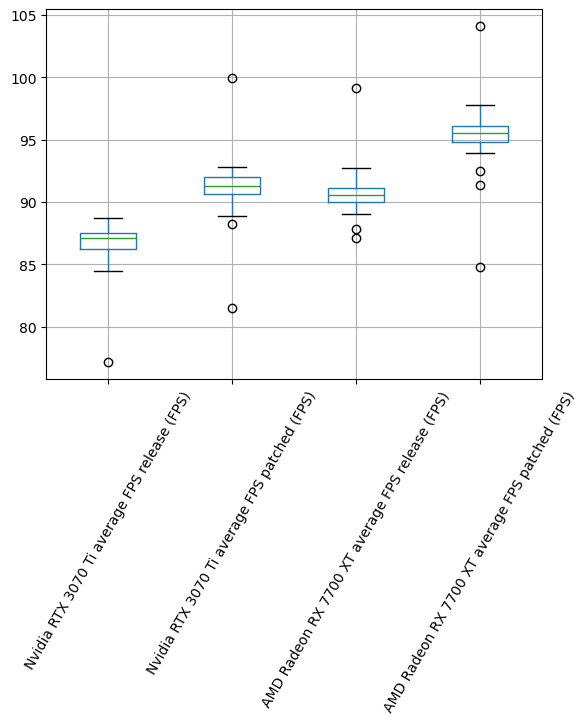

In [8]:
df.boxplot(column=["Nvidia RTX 3070 Ti average FPS release (FPS)", "Nvidia RTX 3070 Ti average FPS patched (FPS)", "AMD Radeon RX 7700 XT average FPS release (FPS)", "AMD Radeon RX 7700 XT average FPS patched (FPS)"], fontsize=10, rot=60)
plt.savefig("boxplot.png", bbox_inches="tight")

In [11]:
df.isna().sum()

Nvidia RTX 2080 Ti average FPS release (FPS)       9
Nvidia RTX 2080 Ti average FPS patched (FPS)       9
Nvidia RTX 3070 Ti average FPS release (FPS)       9
Nvidia RTX 3070 Ti average FPS patched (FPS)       9
AMD Radeon RX 6800 XT average FPS release (FPS)    5
AMD Radeon RX 6800 XT average FPS patched (FPS)    5
AMD Radeon RX 7700 XT average FPS release (FPS)    0
AMD Radeon RX 7700 XT average FPS patched (FPS)    0
dtype: int64

In [63]:
def cutoff(df : pd.DataFrame, column):
    filteredArray = []
    dolni_kvartil = df[column].quantile(0.25)  # Lower quartile (Q1)
    horni_kvartil = df[column].quantile(0.75)  # Upper quartile (Q3)
    # Interquartile range (IQR)
    IQR = horni_kvartil - dolni_kvartil

    # Lower and upper bounds
    dolni_mez = dolni_kvartil - 1.5 * IQR
    horni_mez = horni_kvartil + 1.5 * IQR
    for row in df.iterrows():
        if row[1][column] >= dolni_mez and row[1][column] <= horni_mez:
            filteredArray.append(row[1][column])
        else:
            print(f"Index: {row[0]}")
            filteredArray.append(None)
    return filteredArray

In [15]:
def convertToChange(df : pd.DataFrame):
    nvidiaChange = []
    amdChange = []
    columnsOld = ["Nvidia RTX 3070 Ti average FPS release (FPS)", "Nvidia RTX 3070 Ti average FPS patched (FPS)", "AMD Radeon RX 7700 XT average FPS release (FPS)", "AMD Radeon RX 7700 XT average FPS patched (FPS)"]
    columnsNew = ["Nvidia RTX 3070 Ti FPS Change", "AMD Radeon RX 7700 XT FPS Change"]
    for row in df.iterrows():
        if row[1]["Nvidia RTX 3070 Ti average FPS release (FPS)"] is not None: # Value isnt NaN
            nvidiaChange.append(row[1]["Nvidia RTX 3070 Ti average FPS patched (FPS)"] - row[1]["Nvidia RTX 3070 Ti average FPS release (FPS)"])
        amdChange.append(row[1]["AMD Radeon RX 7700 XT average FPS patched (FPS)"] - row[1]["AMD Radeon RX 7700 XT average FPS release (FPS)"])
    tmp = {
        "Nvidia change": nvidiaChange,
        "Amd change": amdChange
    }
    return tmp

In [64]:
dfChange = pd.DataFrame(convertToChange(df))

In [61]:
dfChange

,Nvidia change,Amd change
0,4.4,4.3
1,3.5,5.3
2,4.8,5.1
3,4.2,5.2
4,4.3,5.1
...,...,...
74,NaN,5.2
75,NaN,5.3
76,NaN,5.1
77,NaN,5.5


In [18]:
nvidiaStats = describeColumn(dfChange, "Nvidia change")
nvidiaStats

{'Rozsah souboru': 10.800000000000011,
 'Minimum': 3.5,
 'Dolní kvartil (Q1)': 3.8000000000000007,
 'Median': 4.299999999999997,
 'Prumer': 4.401428571428572,
 'Horní kvartil (Q3)': 4.6000000000000085,
 'Maximum': 14.300000000000011,
 'Smerodatná odchylka': 1.2699986143028925,
 'Variacni koeficient (%)': 28.854236611880058,
 'Sikmost': 7.019955505369416,
 'Spicatost': 55.243353351241,
 'Dolní mez': 2.599999999999989,
 'Horní mez': 5.80000000000002}

In [21]:
amdStats = describeColumn(dfChange, "Amd change")
amdStats

{'Rozsah souboru': 11.700000000000017,
 'Minimum': -6.1000000000000085,
 'Dolní kvartil (Q1)': 4.450000000000003,
 'Median': 4.900000000000006,
 'Prumer': 4.711392405063291,
 'Horní kvartil (Q3)': 5.200000000000003,
 'Maximum': 5.6000000000000085,
 'Smerodatná odchylka': 1.3060006814475937,
 'Variacni koeficient (%)': 27.72005745146693,
 'Sikmost': -7.4281230704684775,
 'Spicatost': 61.93507080484465,
 'Dolní mez': 3.325000000000003,
 'Horní mez': 6.325000000000003}

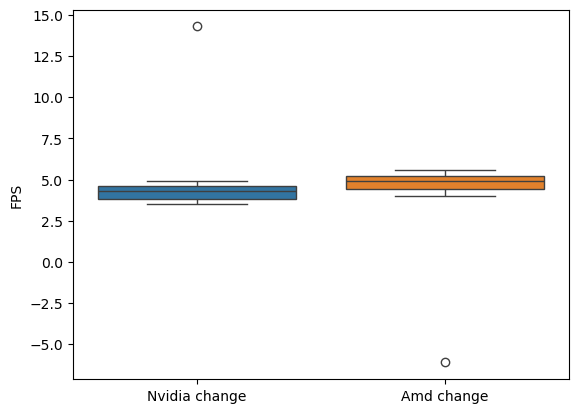

In [55]:
sns.boxplot(dfChange)
plt.ylabel("FPS")
plt.savefig("change.png", bbox_inches="tight")
plt.show()

In [65]:
nvidiaFiltered = cutoff(dfChange, "Nvidia change")
amdFiltered = cutoff(dfChange, "Amd change")
filteredDict = {
    "Nvidia change filtered": nvidiaFiltered,
    "Amd change filtered": amdFiltered
}
filteredDf = pd.DataFrame(filteredDict)

Index: 9
Index: 70
Index: 71
Index: 72
Index: 73
Index: 74
Index: 75
Index: 76
Index: 77
Index: 78
Index: 11


In [46]:
filteredDf

,Nvidia change filtered,Amd change filtered
0,4.4,4.3
1,3.5,5.3
2,4.8,5.1
3,4.2,5.2
4,4.3,5.1
...,...,...
74,NaN,5.2
75,NaN,5.3
76,NaN,5.1
77,NaN,5.5


In [47]:
filteredDf.isna().sum()

Nvidia change filtered    10
Amd change filtered        1
dtype: int64

In [48]:
nvidiaStats = describeColumn(filteredDf, "Nvidia change filtered")
nvidiaStats

{'Rozsah souboru': 1.4000000000000057,
 'Minimum': 3.5,
 'Dolní kvartil (Q1)': 3.799999999999997,
 'Median': 4.299999999999997,
 'Prumer': 4.257971014492753,
 'Horní kvartil (Q3)': 4.6000000000000085,
 'Maximum': 4.900000000000006,
 'Smerodatná odchylka': 0.418121076294419,
 'Variacni koeficient (%)': 9.819725753681046,
 'Sikmost': -0.14936846164737314,
 'Spicatost': -1.2236921414249706,
 'Dolní mez': 2.59999999999998,
 'Horní mez': 5.800000000000026}

In [49]:
amdStats = describeColumn(filteredDf, "Amd change filtered")
amdStats

{'Rozsah souboru': 1.6000000000000085,
 'Minimum': 4.0,
 'Dolní kvartil (Q1)': 4.5,
 'Median': 4.900000000000006,
 'Prumer': 4.8500000000000005,
 'Horní kvartil (Q3)': 5.200000000000003,
 'Maximum': 5.6000000000000085,
 'Smerodatná odchylka': 0.43626216352633035,
 'Variacni koeficient (%)': 8.995096155182068,
 'Sikmost': -0.09005555355352739,
 'Spicatost': -1.1905175299738648,
 'Dolní mez': 3.4499999999999957,
 'Horní mez': 6.250000000000007}

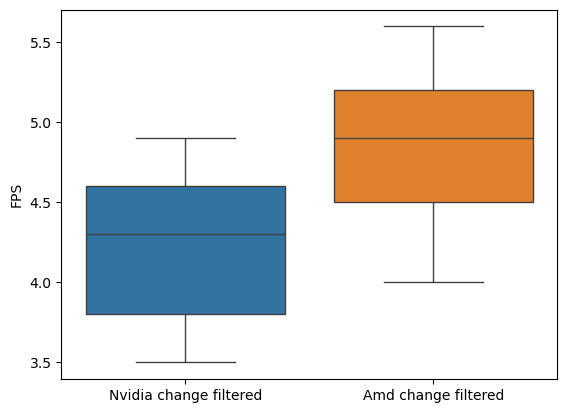

In [56]:
sns.boxplot(filteredDf)
plt.ylabel("FPS")
plt.savefig("filteredChange.png", bbox_inches="tight")
plt.show()

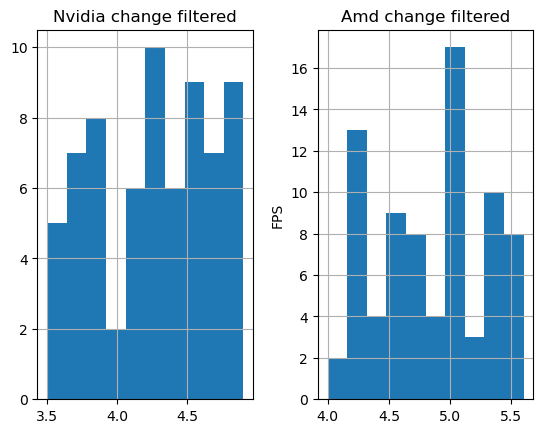

In [69]:
filteredDf.hist(bins=10)
plt.ylabel("FPS")
plt.savefig("histFiltered.png")
plt.show()

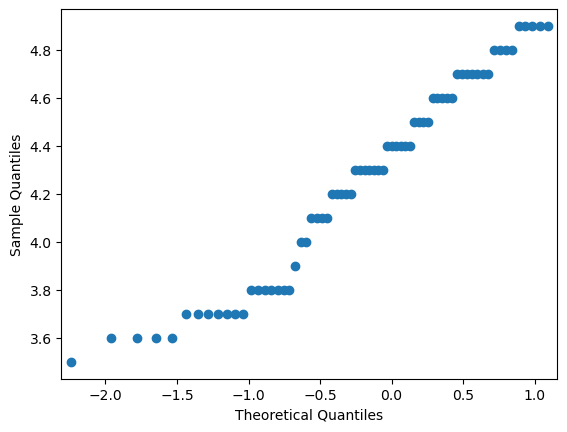

In [73]:
sm.qqplot(filteredDf["Nvidia change filtered"])
plt.savefig("qqNvidia.png")
plt.show()

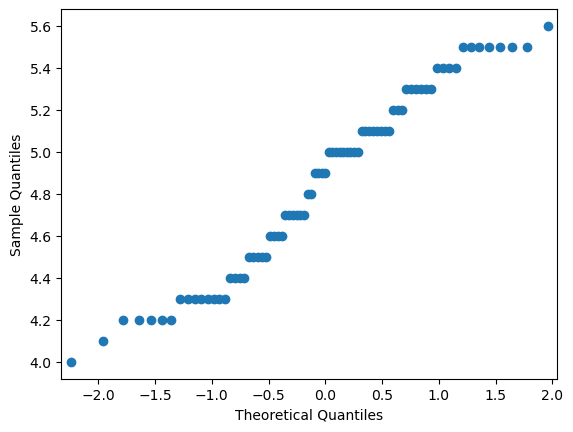

In [74]:
sm.qqplot(filteredDf["Amd change filtered"])
plt.savefig("qqAmd.png")
plt.show()

In [75]:
def sigma3Rule(df, column):
    prumer = df[column].mean()  # Mean
    smerodatna_odchylka = df[column].std()  # Standard deviation
    low = prumer - 2 * smerodatna_odchylka
    up = prumer + 2 * smerodatna_odchylka
    return (low,up)

In [76]:
sigma3Rule(filteredDf, "Amd change filtered")

(3.9774756729473397, 5.722524327052661)

In [77]:
def chebyshevRule(df, column, k=2):
    prumer = df[column].mean()  # Mean
    smerodatna_odchylka = df[column].std()  # Standard deviation
    low = prumer - k * smerodatna_odchylka
    up = prumer + k * smerodatna_odchylka
    return (low,up)

In [78]:
chebyshevRule(filteredDf, "Nvidia change filtered")

(3.4217288619039152, 5.094213167081591)

In [79]:
(4.138 - 2*0.603, 4.138 + 2*0.603)

(2.932, 5.343999999999999)